In [2]:
#Spotify Data Analysis Project :

# 🎶 Spotify Data Analysis

## 📝 Objective
Analyse the Spotify dataset to understand **factors affecting song popularity**, identify insights for **music trends**, and recommend strategies for artists and production companies.

---

### 📌 Problem Statement
Spotify is one of the largest audio streaming platforms with millions of tracks. This analysis aims to:

- Understand characteristics of popular songs.
- Identify trends in features like tempo, danceability, energy, and more.
- Help music enthusiasts, data analysts, and production companies gain actionable insights.

---

### 📊 Dataset Source
[Spotify Dataset from Kaggle](https://www.kaggle.com/datasets) <!-- Replace with actual dataset URL -->

---


In [6]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting styles for professional plots
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)


In [7]:
# Load dataset

df = pd.read_csv('SpotifyFeatures.csv') 
df.head()


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [8]:
# Dataset shape and info
print("Dataset Shape:", df.shape)
df.info()

# Checking for missing values
df.isnull().sum()

# Descriptive statistics
df.describe()


Dataset Shape: (232725, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [9]:
# Example: Dropping duplicates if any
df.drop_duplicates(inplace=True)

# Checking again
df.isnull().sum()


genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

### 🎯 Popularity Distribution

Let's analyse how song popularity is distributed in this dataset to understand general listener preferences.


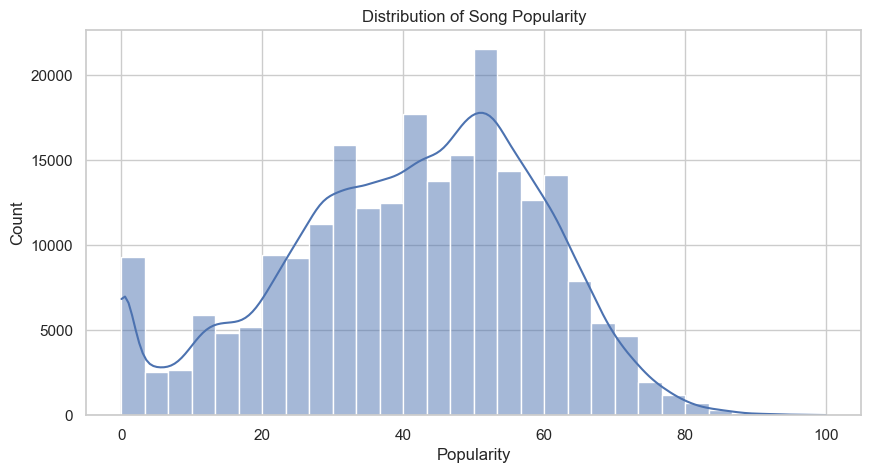

In [10]:
# Distribution of Popularity
plt.figure(figsize=(10,5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()


### 🔗 Correlation Heatmap

Let's visualise the correlations between different numerical features to identify strong relationships.


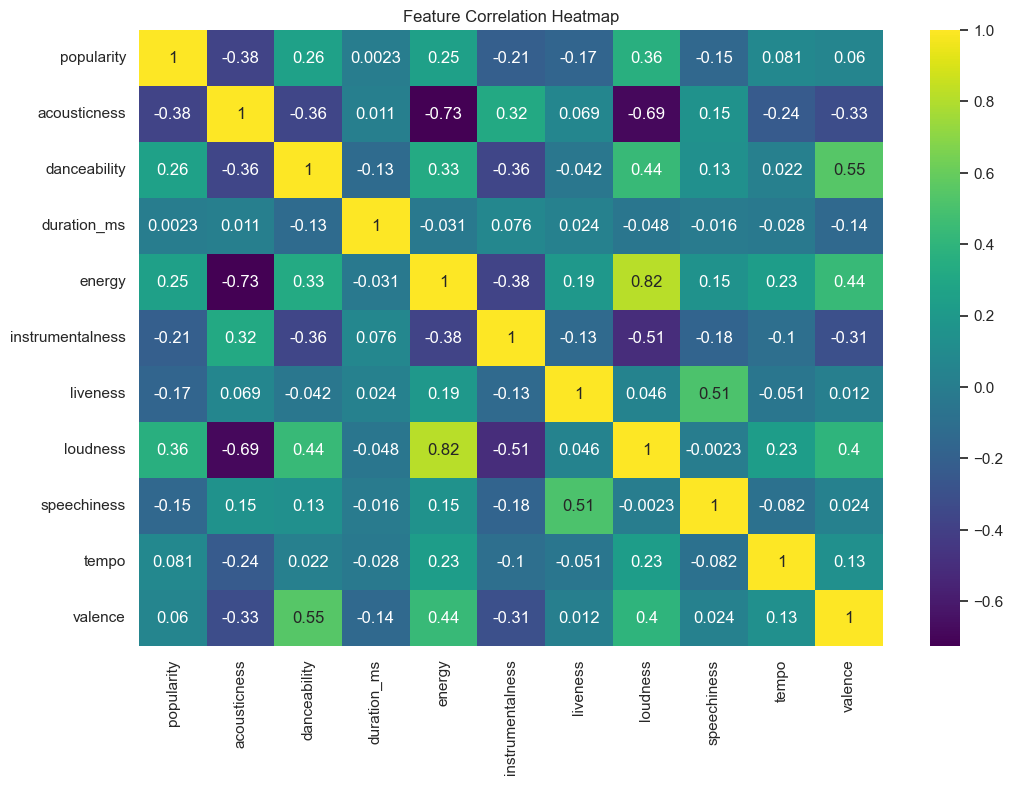

In [12]:
# Correlation heatmap (only for numeric columns)

plt.figure(figsize=(12,8))

# Selecting numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Creating heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()


### ⚡ Energy vs Popularity

Energy is a measure from 0.0 to 1.0 representing intensity and activity. Let's see how it relates to song popularity.


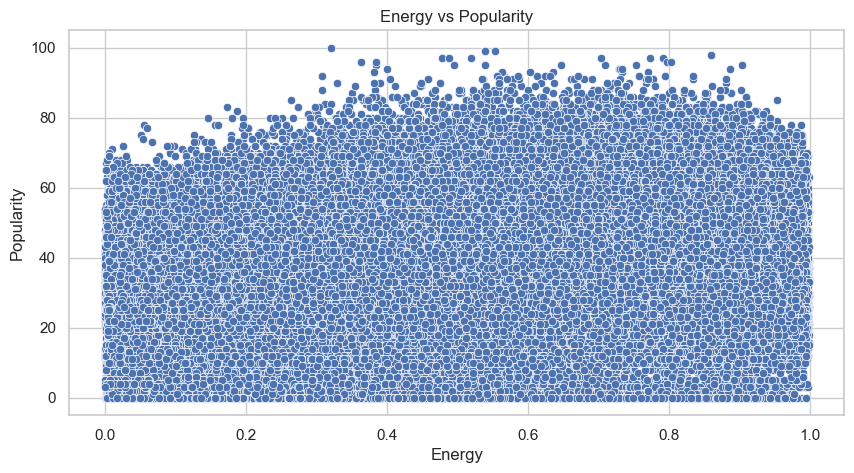

In [13]:
# Energy vs Popularity
plt.figure(figsize=(10,5))
sns.scatterplot(x='energy', y='popularity', data=df)
plt.title('Energy vs Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity')
plt.show()


### 🔍 Observation
There is a **positive correlation** between energy and popularity, indicating that **energetic songs tend to be more popular** among listeners.


### 🎼 Top 10 Genres by Average Popularity

This barplot visualises the **top 10 music genres on Spotify** based on their **average popularity scores**. It helps identify which genres are most liked by listeners, providing insights for artists, producers, and marketing teams to understand **current musical trends and audience preferences**.


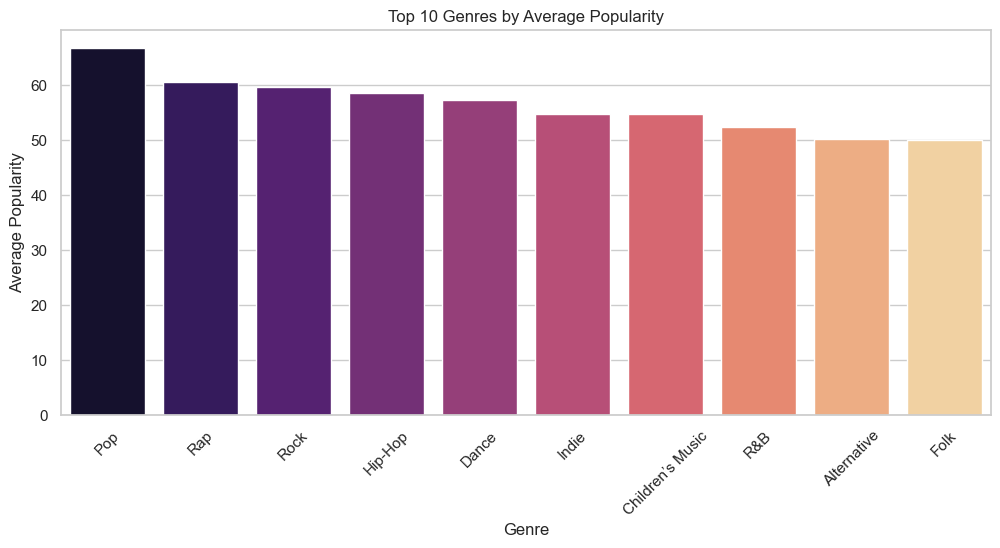

In [15]:
plt.figure(figsize=(12,5))
sns.barplot(x=top_genres.index, y=top_genres.values, hue=top_genres.index, palette='magma', dodge=False, legend=False)
plt.title('Top 10 Genres by Average Popularity')
plt.ylabel('Average Popularity')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.show()


## ✅ Conclusion & Recommendations

🔑 **Key Insights:**
- **High energy and danceability songs are more popular.**
- **Loudness correlates with energy**, indicating production styles for popular music.
- Most songs have **popularity scores between 20-60**, with only a few exceeding 80.

🎯 **Recommendations:**
- Artists and producers can focus on **creating energetic, danceable tracks** to increase popularity.
- Future analysis can include **genre-wise popularity analysis** and **sentiment analysis of lyrics** to refine music strategy further.

---

📌 **Next Steps:**
- Build a **predictive model** to forecast song popularity based on audio features.
- Perform **time-series analysis** to track trends over years for strategic production planning.

---
